<a href="https://colab.research.google.com/github/Math-Muniz/iFood-Data-Analytics/blob/main/iFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**iFood**

#**iFood Data Analyst Case**

[Matheus Muniz](https://www.linkedin.com/in/math-muniz/) - 09/2022

### Você pode consultar mais sobre o meu [github.](https://github.com/Math-Muniz)

### Você pode consultar mais sobre este estudo de casos do iFood neste [link](https://github.com/ifood/ifood-data-analyst-case).

### Vamos começar com uma parte que muitos acham dificil e as vezes acabam pulando essa parte porém mesmo sendo demorado algumas vezes é uma parte essencial. 

### Então fiz o meu melhor para seguir uma análise abrangente, mas não exaustiva, dos dados. Eu estou longe de relatar um estudo muito aprofundado neste kernel, mas espero que possa ser útil para todos, então estou compartilhando como apliquei alguns desses princípios de análise de dados a esse problema do iFood.

# **Nós iremos ter 7 capítulos neste notebook que eu tento explicar como foi feita minha ánalise passo a passo:**

**Analíse Exploratória.** Nesse capítulo vamos olhar para cada variável e fazer uma análise filosófica sobre seu significado e a importância para este problema.

**Estudo univariável.** Vamos nos concentrar apenas na variável dependente 
('Response') e tentar saber um pouco mais sobre ela.

**Limpeza e tratamento dos dados** Vamos limpar o conjunto de dados e lidar com os dados ausentes, valores discrepantes, valores incorretos e variáveis ​​categóricas.

**Estudo multivariado.** Tentaremos entender como a variável dependente e as variáveis ​​independentes se relacionam.

**Testar suposições.** Verificaremos se nossos dados atendem às suposições exigidas pela maioria das técnicas multivariadas.

**Mãos a obra com Machine Learning.** Aqui iremos ver sobre o modelo de regressão linear e sobre algumas métricas usadas para avaliar o potencial do modelo.

**Conclusão.** Iremos fazer a conclusão analisando as nossas métricas usadas e faremos a importação da arvore de decisão para um arquivo .dot.

## Este Nootebook usará as seguintes bibliotecas e suas versões:

1. Nome: Python | Versão: 3.7.13
2. Nome: pandas | Versão: 1.3.5
3. Nome: matplotlib | Versão: 3.2.2
4. Nome: seaborn | Versão: 0.11.2
5. Nome: numpy | Versão: 1.21.6
6. Nome: scipy | Versão: 1.7.3
7. Nome: sklearn | Versão: 0.0
8. Nome: statistics | 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts
import warnings
import graphviz
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from google.colab import files 
from collections import Counter
from google.colab import drive
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import (confusion_matrix,
                              accuracy_score, 
                              matthews_corrcoef, 
                              make_scorer, 
                              f1_score)
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
warnings.filterwarnings('ignore')
%matplotlib inline

## Abaixo vamos começar a baixar nossos dados diretamente do Github do iFood e depois disso vamos dar inicio um pouco com a parte da analíse exploratória para conhecer mais nossos dados.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ifood/ifood-data-analyst-case/main/retail_case_data.csv")

In [ ]:
#Visualizando as primeiras 10 linhas do dataframe
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
# Checando as colunas contidas no arquivo csv que importamos
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Checando mais informações sobre o arquivo csv que importamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Selecionando as Colunas Numéricas
df.select_dtypes(include='number').head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Separando as colunas somente com valores inteiros
df.select_dtypes(include=['int'])

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Separando as Colunas somente com valores flutuantes
df.select_dtypes(include=['float'])

,Income
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0
...,...
2235,61223.0
2236,64014.0
2237,56981.0
2238,69245.0


In [ ]:
#Selecionando as Colunas de Objeto
df.select_dtypes(include='object')

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,2012-09-04
1,Graduation,Single,2014-03-08
2,Graduation,Together,2013-08-21
3,Graduation,Together,2014-02-10
4,PhD,Married,2014-01-19
...,...,...,...
2235,Graduation,Married,2013-06-13
2236,PhD,Together,2014-06-10
2237,Graduation,Divorced,2014-01-25
2238,Master,Together,2014-01-24


In [ ]:
#Verificamos se exite algum dado duplicado pelo ID
df[df.duplicated(['ID'], keep=False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


# 1. **Analíse Exploratória**

Para entender nossos dados, podemos olhar para cada variável e tentar entender seu significado e relevância para este problema. Eu sei que isso é demorado, mas é completamente necessário conhecermos nossos dados antes de analisarmos e mexermos nele.

Para termos alguma disciplina em nossas análises, podemos criar uma planilha Excel ou uma Google Sheets com as seguintes colunas:

1.   **Variável** - Nome da variável.

2.   **Tipo** - Identificação do tipo das variáveis. Existem dois valores possíveis para este campo: 'numérico' ou 'categórico'. Por 'numérico' queremos dizer variáveis ​​para os quais os valores são números, e por 'categórico' queremos dizer variáveis ​​para os quais os valores são categorias.

3.   **Segmento** - Identificação do segmento das variáveis. Podemos definir quatro segmentos possíveis: campanha, cliente, vendas e gastos. Quando dizemos 'campanha', queremos dizer que se relaciona a aceitação do cliente com a ofertas realizadas nas campanhas (por exemplo, 'AcceptedCmp1'). Quando dizemos 'cliente', queremos dizer uma variável que fornece informações sobre o cliente (por exemplo, 'Marital' ou 'Education'). Quando dizemos 'vendas', queremos dizer uma variável que se relaciona através da venda de produtos pelos canais de venda (por exemplo, 'NumStorePurchases'). Finalmente, quando dizemos 'gastos', queremos dizer uma variável que fornece informações sobre o valores gastos em determinados tipos de produtos (por exemplo, 'MntGoldProds').

4.   **Expectativa** - Nossa expectativa sobre a influência da variável em 'SalePrice'. Podemos usar uma escala categórica com 'Alto', 'Médio' e 'Baixo' como valores possíveis.

5.   **Conclusão** - Nossas conclusões sobre a importância da variável, após darmos uma rápida olhada nos dados. Podemos manter a mesma escala categórica de 'Expectativa'.

6.   **Comentários** - Quaisquer comentários gerais que nos ocorreram.

Enquanto 'Tipo' e 'Segmento' são apenas para possível referência futura, a coluna 'Expectativa' é importante porque nos ajudará a desenvolver um 'sexto sentido'. Para preencher esta coluna, devemos ler a descrição de todas as variáveis ​​e, uma a uma, nos perguntar.

1.   Pensamos nessa variável quando estamos prever a variável desejada? (por exemplo, quando pensamos em vender/comprar comida, nos preocupamos com o sua 'Income'?).
2.   Se sim, qual seria a importância dessa variável? (por exemplo, qual é o impacto de ter um produto 'Gold' em vez de um produto 'Padrão'? E de comprar um produto 'Gold' em vez de comprar um produto com 'Desconto'?).
3.   Essa informação já está descrita em alguma outra variável? (por exemplo, se 'AcceptedCmp1', realmente precisamos conhecer o 'AcceptedCmp2'?).

Após este exercício assustador, podemos filtrar a planilha e olhar atentamente para as variáveis ​​com 'Alta' 'Expectativa'. 
Então, podemos nos apressar em alguns gráficos de dispersão entre as variáveis ​​e 'Response', preenchendo a coluna 'Conclusão' que é apenas a correção de nossas expectativas.

#**2. Antes de mais nada: Estudo Univariável**

Vamos nos concentrar apenas na variável ('Response') que é o nosso alvo e tentar saber um pouco mais sobre ela.

In [ ]:
#Analise Estatistica da Variavel 'Response'
df['Response'].describe()

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

Describe não nos deu uma análise boa pois a váriavel 'Response' nos só temos 0 (não) e 1 (sim).

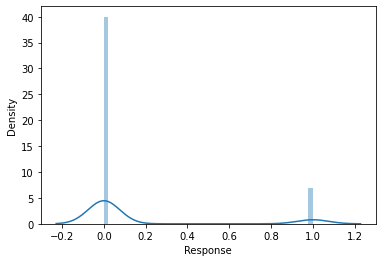

In [ ]:
#Histograma
sns.distplot(df['Response'])

In [ ]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Com esse Histograma podemos analisar que os nossos dados tem: 

* <b>Desvio da distribuição Bimodal.</b>
* <b>Tem assimetria positiva apreciável.</b>
* <b>Mostra picos.</b>

*Isso está ficando interessante então vamos continuar nossa Análise!*

In [ ]:
#Skewness and Kurtosis
print("Skewness: %f" % df['Response'].skew())
print("Kurtosis: %f" % df['Response'].kurt())

Skewness: 1.971555
Kurtosis: 1.888714


**Skewness e Kurtosis**

Um **valor positivo de Skewness (Assimetria)** implica uma inclinação para a direita. A cauda direita do gráfico de densidade de probabilidade é mais longa que a esquerda.
Podemos descrever distribuições com uma Skewness (Assimetria) **inferior a -1 ou superior a 1** como substancialmente assimétrica.

Um **valor positivo de Kurtosis** significa que seu conjunto de dados é **mais "pesado no pico"** (pontiagudo) do que a distribuição normal;
Consideramos distribuições com Kurtosis **maior que 1** muito pontiagudo.

# **3. Criação de Algumas tabelas que podem facilitar no nosso entendimento dos dados.**


Vamos começar dando uma olhada na tabela 'Dt_Customer'.

In [ ]:
df['Dt_Customer'].describe()

count           2240
unique           663
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

Agora nos vamos agrupar e verificar os dados de 'Dt_Customer'

In [ ]:
Dt_agrupado = df.groupby(['Dt_Customer']).size()
Dt_agrupado

Dt_Customer
2012-07-30    1
2012-07-31    1
2012-08-01    4
2012-08-02    3
2012-08-03    5
             ..
2014-06-25    5
2014-06-26    4
2014-06-27    3
2014-06-28    3
2014-06-29    2
Length: 663, dtype: int64

Com isso conseguimos descobrir a última data registrada pelo cliente e usaremos essa data máxima a seguir para criarmos a tabela 'Age' para melhor entendimento. Vamos demonstrar como criar a tabela que seria uma simples conta do ano de 2014 - 'Year_Birth'.

In [ ]:
df["Age"] = 2014 - df["Year_Birth"]
df["Age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

Agora com a tabela 'Age' criada vamos para a próxima tabela que seria a 'Total_AcceptedCmp' que nela iremos colocar a soma de todos os 'AcceptedCmp'.
Primeiro vamos conferir a quantidade de AcceptedCmp que temos em cada coluna podemos ver que se somarmos todas as colunas o valor total é 667.

In [ ]:
df[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
dtype: int64

Abaixo vamos criar nossa nova coluna 'Total_AcceptedCmp' que vão ser a soma das colunas 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'.

In [ ]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_AcceptedCmp']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Total_AcceptedCmp, Length: 2240, dtype: int64

Vamos conferir se o valor total bate com o número de somas do AcceptededCmp1 até o Cmp5 que já vimos ali em cima ser 667.

In [ ]:
df[['Total_AcceptedCmp']].sum()

Total_AcceptedCmp    667
dtype: int64

Agora iremos para o nosso próximo e último passo dessa sessão que vai ser a criação da tabela da quantidade de dias que o úsuario está registrado.

Primeiro vamos mudar o formato do DataFrame 'Dt_Customer'

In [ ]:

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

Vamos então consultar os dados para se é possível criar uma tabela de dias em que foi registrado o consumidor. Se for possível nos então criaremos uma tabela chamada 'Days_Registered' e então vamos analisar um pouco seus dados.

In [ ]:
(df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Dt_Customer, Length: 2240, dtype: int64

In [ ]:
df["Days_Registered"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

In [ ]:
df["Days_Registered"].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: Days_Registered, dtype: float64

Conferindo o dataframe novamente e analisando se a novas colunas 'Age', 'Total_AcceptedCmp' e 'Days_Registered' foram criadas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **4. Limpeza e tratamento dos dados**

##**Dados Ausentes!**

Vamos começar com os dados ausentes. As perguntas importantes ao pensar em dados ausentes são:

Qual a prevalência dos dados ausentes?
Os dados ausentes são aleatórios ou têm um padrão?
A resposta a essas perguntas é importante por razões práticas, pois a falta de dados pode implicar na redução do tamanho da amostra. Isso pode nos impedir de prosseguir com a análise. Além disso, de uma perspectiva substantiva, precisamos garantir que o processo de dados ausentes não seja tendencioso e ocultando uma verdade inconveniente.

In [ ]:
#Verificando se existem dados nulos para serem tradados.
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Total_AcceptedCmp       0
Days_Registered         0
dtype: int64

Podemos ver que a tabela 'INCOME' contém dados nulos que precisam ser tratados.

In [ ]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
#Calculo Mediana Income
mediana_income = sts.median(df['Income'])
mediana_income

21867.0

In [ ]:
#Substituição dos Valores Nulos pela mediana
df['Income'].fillna(mediana_income, inplace=True)

In [ ]:
#Verificação se existe algum dado que ainda está nulo.
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Total_AcceptedCmp      0
Days_Registered        0
dtype: int64

##**Outliers!**

Outliers também é algo que devemos estar cientes. Por quê? Porque os outliers podem afetar bastante nossos modelos e podem ser uma valiosa fonte de informação, fornecendo-nos insights sobre comportamentos específicos.

Outliers é um assunto complexo e merece mais atenção então caso queira se aprofundar procure um pouco mais sobre pois aqui, faremos apenas uma análise rápida.

Com isso conseguimos descobrir a última data registrada pelo cliente e usaremos essa data máxima a seguir para criarmos a tabela 'Age' para melhor entendimento. Vamos demonstrar como criar a tabela que seria uma simples conta do ano de 2014 - 'Year_Birth'.

Text(0.5, 1.0, 'Idade')

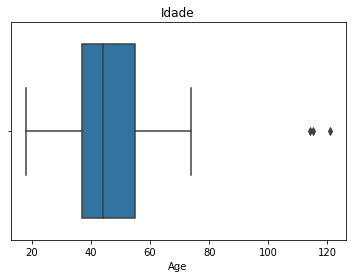

In [ ]:
#Visualização grafica da Idade para ver se contém algum Outlier.
sns.boxplot(df['Age']).set_title('Idade')

In [ ]:
#Describe para visualizar aonde está realmente o valor máximo (outlier)
df["Age"].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [ ]:
#Melhor visualização das idades que foram cadastradas.
age_agrupado = df.groupby(['Age']).size()
age_agrupado
#114,115 e 121 são anos a serem tratados (outliers)

Age
18      2
19      5
20      3
21      5
22     13
23     15
24     18
25     30
26     29
27     27
28     42
29     32
30     38
31     42
32     45
33     39
34     39
35     53
36     77
37     52
38     89
39     83
40     69
41     74
42     79
43     87
44     77
45     71
46     51
47     44
48     50
49     74
50     42
51     45
52     44
53     36
54     49
55     51
56     53
57     43
58     55
59     49
60     50
61     35
62     52
63     43
64     29
65     30
66     21
67     16
68     16
69      8
70      7
71      7
73      1
74      1
114     1
115     1
121     1
dtype: int64

In [ ]:
#Calculo Mediana Age
mediana_age = sts.median(df['Age'])
mediana_age

44.0

In [ ]:
#Calculo Media Age
media_age = sts.mean(df['Age'])
media_age

45.19419642857143

In [ ]:
# Verificamos os casos que estão fora da curva
df.loc[(df['Age'] < 0 ) | (df['Age'] > 110)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_AcceptedCmp,Days_Registered
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,114,0,276
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,121,0,43
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,115,1,276


In [ ]:
#Podemos verificar que a media e mediana estão muito perto, como o valor da mediana se repete mais vezes 
#foi decidido substituir os Outliers pela mediana
df.loc[(df['Age'] < 0 ) | (df['Age'] > 110), 'Age'] = mediana_age

In [ ]:
# Verificamos novamente se os casos continuam ou foram substituidos
df.loc[(df['Age'] < 0 ) | (df['Age'] > 110)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_AcceptedCmp,Days_Registered


Text(0.5, 1.0, 'Idade')

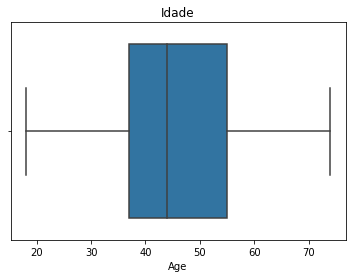

In [ ]:
#Visualização grafica da Idade para ver se contém algum erro.
sns.boxplot(df['Age']).set_title('Idade')

Agora já que descobrimos Outliers na nossa nova tabela 'Age' grandes chances de existirem Outliers na tabela 'Year_Birth' pois as duas tabelas tem relações umas com as outras.

Text(0.5, 1.0, 'Ano de Nascimento')

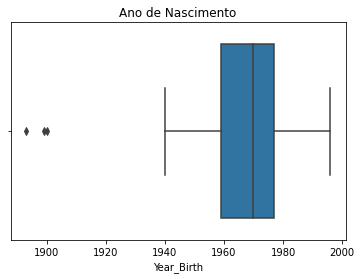

In [ ]:
#Visualização Gráfica para ver se encontramos Outliers
sns.boxplot(df['Year_Birth']).set_title('Ano de Nascimento')

In [ ]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
Nascimento_agrupado = df.groupby(['Year_Birth']).size()
Nascimento_agrupado

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
dtype: int64

In [ ]:
#Verificando os Outliers que tem mais de 100 anos em Year_Birth e Corrigindo eles.
df.loc[(df['Year_Birth'] < 1904 ) | (df['Year_Birth'] > 2014)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_AcceptedCmp,Days_Registered
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,44,0,276
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,44,0,43
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,44,1,276


Assim como a tabela 'Age' nos iremos substituir os valores que são Outliers pelos valores da mediana.

In [ ]:
#Calculando a Mediana
mediana_year = sts.median(df['Year_Birth'])
mediana_year 

1970.0

In [ ]:
#Verificando se o Valor da mediana bate com o Age
2014 - mediana_year 

44.0

In [ ]:
#Substituindo os Outliers pela Mediana do ano de Nascimento
df.loc[(df['Year_Birth'] < 1904 ) | (df['Year_Birth'] > 2014), 'Year_Birth'] = mediana_year

In [ ]:
#Conferindo se os dados foram Ajustados
df.loc[(df['Year_Birth'] < 1904 ) | (df['Year_Birth'] > 2014)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_AcceptedCmp,Days_Registered


Text(0.5, 1.0, 'Ano de Nascimento')

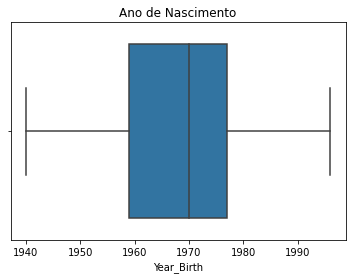

In [ ]:
#Vamos usar um Box plot para vermos se temos algum erro ainda no gráfico.
sns.boxplot(df['Year_Birth']).set_title('Ano de Nascimento')

## **Tratamento de variáveis com valores incorretos ou que não existem.**

Ao olhar melhor nossos dados percebi que temos algumas variavéis em 'Marital' que estão incorretas ou não existem na vida real (por exemplo, 'Alone'), então vou tentar tratar essas variáveis.

In [ ]:
#Verificando os dados de Educação
education_agrupado = df.groupby(['Education']).size()
education_agrupado
#Dados OK

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

In [ ]:
#Agrupando e Verificando os dados de 'Marital'
marital_agrupado = df.groupby(['Marital_Status']).size()
marital_agrupado

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

Erros encontrados 'Alone', 'Absurd', 'YOLO' e 'Together' também não se encaixam em estado civil pois não foram legalmente reconhecidos, os dados corretos são somente 'Divorced', 'Single', 'Married' and 'Widow' pois são os únicos estados civis reconhecidos.

In [ ]:
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = "Single"
df.loc[df['Marital_Status'] == 'Together', 'Marital_Status'] = "Single"
#Verificando os dados do Estado Civil
marital_agrupado = df.groupby(['Marital_Status']).size()
marital_agrupado

Marital_Status
Absurd         2
Divorced     232
Married      864
Single      1063
Widow         77
YOLO           2
dtype: int64

Eu escolhi substituir Alone por Single já que são a mesma coisa e Together por Single pois a pessoa pode estar junta mas não casada então não se aplica ao Estado Civil.

In [ ]:
df.loc[df['Marital_Status'].isin(['YOLO','Absurd']), 'Marital_Status'] = "Single"
#Verificando os dados do Estado Civil
marital_agrupado = df.groupby(['Marital_Status']).size()
marital_agrupado

Marital_Status
Divorced     232
Married      864
Single      1067
Widow         77
dtype: int64

Acabei também escolhendo substituir o 'YOLO' e 'Absurd' por 'Single' pois 'Single' é o valor que mais se repete e o mais comum e com isso foi concluido o 'Marital_Status', agora estamos dentro do Padrão usado no Estado Civil.

# **5. Estudo Multivariado**

Até agora apenas seguimos nossa intuição e analisamos as variáveis ​​que achávamos importantes. Apesar de nossos esforços para dar um caráter objetivo à nossa análise, devemos dizer que nosso ponto de partida foi subjetivo.

Como Analista, não me sinto confortável com essa abordagem. Então para explorar, vamos começar com algumas receitas práticas para dar sentido à nossa analise:

Matriz de correlação (estilo de mapa de calor).

Matriz de correlação 'Response' (estilo de mapa de calor com zoom).

Gráficos de dispersão entre as variáveis ​​mais correlacionadas

## **Correlação**

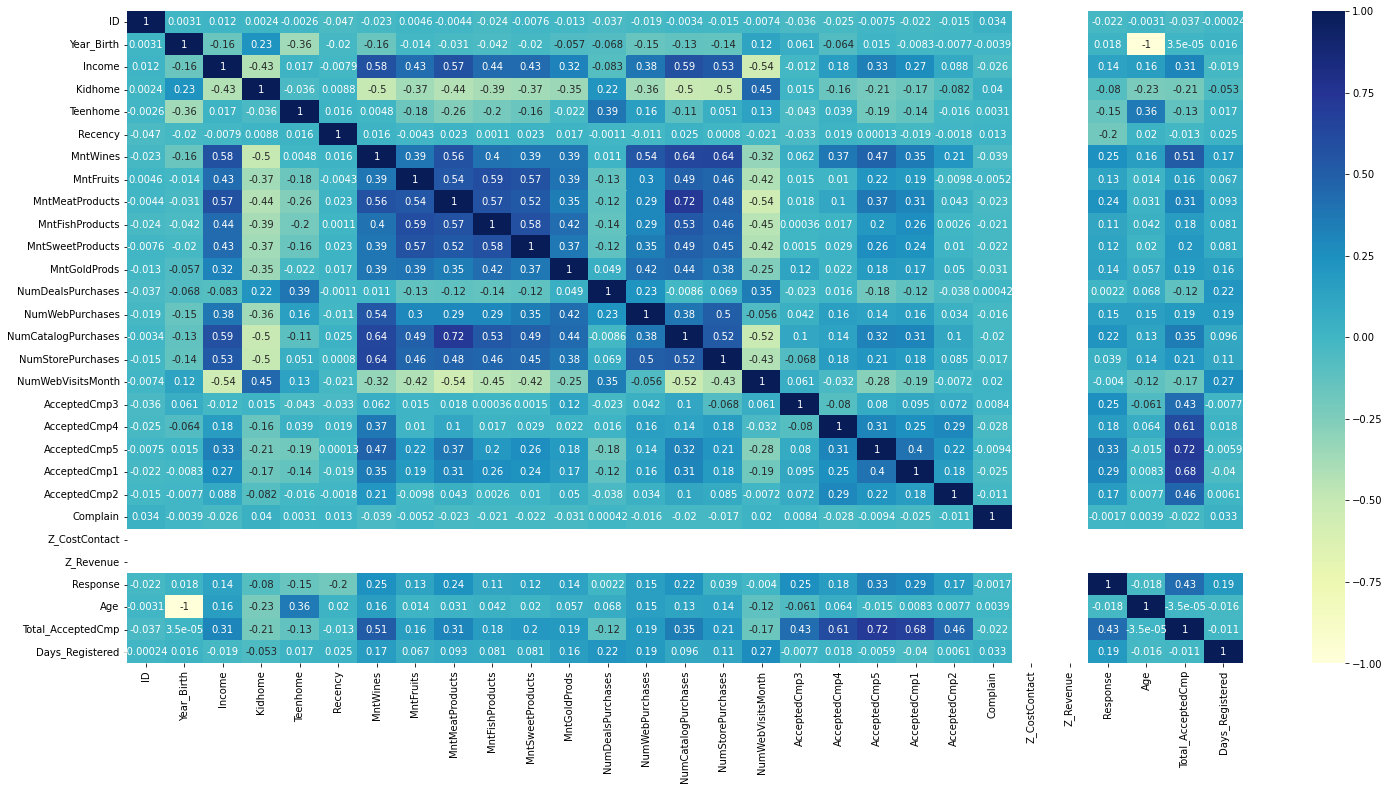

In [ ]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(25,12))
sns.heatmap(corrmat,cmap='YlGnBu', annot=True)

**Na minha opinião**, este mapa de calor é a melhor maneira de obter uma visão geral rápida dos nosso dados e seus relacionamentos.

Matriz de Correlação 'Response' selecionando no máximo 10 variáveis no nosso heatmap. 

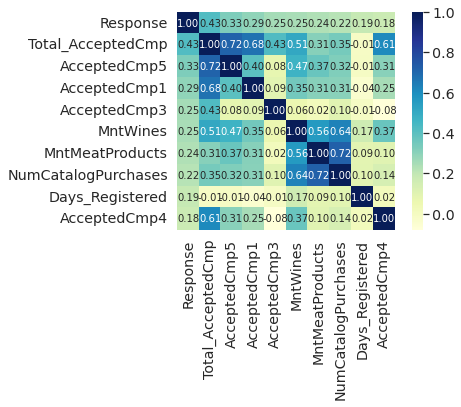

In [ ]:
 
k = 10 
cols = corrmat.nlargest(k, 'Response')['Response'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.30)
hm = sns.heatmap(cm, cbar=True, annot=True,  cmap='YlGnBu', square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

De acordo com o nosso maravilhoso python, essas são as variáveis ​​mais correlacionadas com 'SalePrice'. Meus pensamentos sobre isso:



*   Não tem uma váriavel com uma correlação média/alta (Maior que 0,5 ou -0,5) para podermos ter uma melhor perfomance do nosso modelo.
*   Tem variáveis como 'AcceptedCmpt5', 'AcceptedCmp1', 'AcceptedCmp3' que já foram unidas na 'Total_AcceptedCmp' que por incrivel que pareça é nossa variável com maior correlação.


## **Scatter plots entre 'SalePrice' e as variáveis ​​correlacionadas**

Prepare-se para o que você está prestes a ver. Devo confessar que a primeira vez que vi esses gráficos de dispersão fiquei totalmente deslumbrado pois são tantas informações que podemos reter dele! Mais uma vez, obrigado @seaborn!

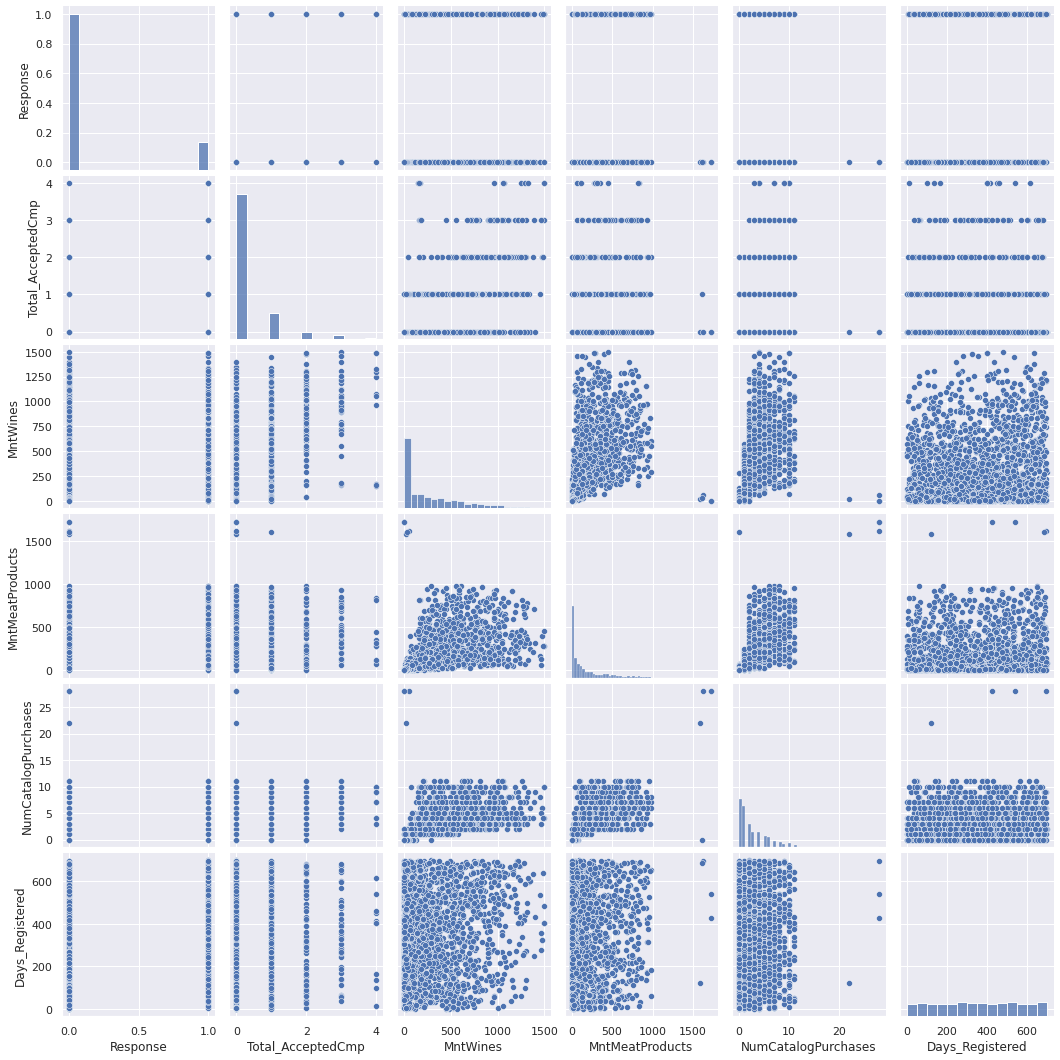

In [ ]:
#scatterplot
sns.set()
cols = ['Response', 'Total_AcceptedCmp', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Days_Registered']
sns.pairplot(df[cols], height = 2.5)
plt.show();

Embora já conheçamos algumas das principais figuras, este mega scatter plot nos dá uma ideia razoável sobre as relações das variáveis.


# **6. Machine Learning**

Depois que vimos o Heatmap feito pelo Seaborn podemos ver quais dados tem mais correlação com a tabela 'Response' que é o nosso alvo, as colunas 'Total_AcceptedCmp', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases' e 'Days_Registered' seram as selecionadas como nossos previsores pois são as variáveis com a correlação mais alta. Abaixo irei usar o modelo de machine learning de Árvore de Decisão para podermos prever nossa classe.



##**Árvore de Decisão**

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais).

Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta.

Vamos então selecionar as tabelas com mais correlação que seram nossos previsores e nossa classe que é o nosso alvo 'Response':

In [ ]:
previsores = df[['Total_AcceptedCmp','MntWines','MntMeatProducts','NumCatalogPurchases','Days_Registered']].values
classe = df[['Response']].values

Aqui nós vamos fazer a divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 42 para sempre obter a mesma divisão da base quando o código for executado.

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split (previsores,
                                                                   classe,
                                                                   test_size = 0.3,
                                                                   random_state= 42)

Abaixo Treinaremos nosso modelo e usaremos o metodo fit para depois fazer nossas previsões.

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier()

In [ ]:
scoring = make_scorer(matthews_corrcoef)

In [ ]:
previsoes = arvore.predict(X_teste)
previsoes

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

Agora nos podemos gerar nossa queridinha **matriz de confusão**.

Lembrando que no campo do Machine Learning uma **matriz de confusão** é uma tabela que permite a visualização do desempenho de um algoritmo de classificação

In [ ]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[501,  76],
       [ 58,  37]])

Agora podemos ver a taxa de acerto do nosso modelo através da accuracy_score, usaremos outras métricas também como a F1 e MCC que vão nos auxiliar se o modelo e os dados estão balanceados ou não.

In [ ]:
print("MCC: ", matthews_corrcoef(y_teste, previsoes))
print("F1: ", f1_score(y_teste, previsoes))
print("ACC: ", accuracy_score(y_teste, previsoes))

MCC:  0.24011350661298766
F1:  0.3557692307692308
ACC:  0.8005952380952381


MCC: Métrica boa para avaliar modelos em dados desbalanceados.

F1: O F1 só é baixo em dados desbalanceados se a classe minoritária tiver label '1'!

ACC: Observe o Paradoxo da Acurácia acontecendo, pois temos uma taxa de acerto alta porém existem bem mais casos '0' que '1' fazendo com que nossos dados fiquem desbalanceados!

##**Balanceamento dos Dados**

Nesse Tópico iremos usar dois metodos de balanceamento de dados para que o nosso modelo não fique tão desbalanceado, vamos analisar também se ao usarmos os metódos o que irá acontecer com nossas métricas MCC, F1 e ACC.

### **1.   Oversampling**

O Oversampling consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

A maneira mais primitiva de fazer um Oversampling é por meio de cópias de dados já existentes na classe minoritária. Por exemplo, se nossos dados possuem três parâmetros (x, y e z) o Oversampling poderia ser feito escolhendo algumas entries e simplesmente duplicando o número de vezes que essas entries aparecem. A conduta descrita acima pode oferecer bons resultados quando a classe minoritária não tem uma variação quantitativa muito grande nos seus parâmetros, caso contrário o modelo pode ficar muito bom em identificar casos específicos da classe minoritária e não a categoria como um todo.



In [ ]:
ros = RandomOverSampler(random_state = 42)

In [ ]:
X_train_over, y_train_over = ros.fit_resample(X_treinamento, y_treinamento)

In [ ]:
arvore.fit(X_train_over, y_train_over)
y_predict_over = arvore.predict(X_teste)
print("MCC: ", matthews_corrcoef(y_teste, y_predict_over))
print("F1: ", f1_score(y_teste, y_predict_over))
print("ACC: ", accuracy_score(y_teste, y_predict_over))

MCC:  0.19736763230173293
F1:  0.31472081218274117
ACC:  0.7991071428571429


Vamos tentar um modo diferente abaixo usando o cross_validate para ver se melhorarmos o resultado.

In [ ]:
X_train_over, X_teste_over , y_train_over, y_teste_over = train_test_split (previsores,
                                                                   classe,
                                                                   test_size = 0.3,
                                                                   random_state= 42)

In [ ]:
# Random Oversampling:
scoring = {'mcc': make_scorer(matthews_corrcoef), 'f1':'f1', 'acc': 'accuracy'}
results_ros = cross_validate(arvore.fit(X_train_over, y_train_over),
                             X_train_over, y_train_over,
                             cv=20, scoring=scoring)
print("MCC: ", round(results_ros['test_mcc'].mean(), 4))
print("F1: ", round(results_ros['test_f1'].mean(), 4))
print("ACC: ", round(results_ros['test_acc'].mean(), 4))

MCC:  0.3276
F1:  0.4247
ACC:  0.8227


In [ ]:
previsoes_over = arvore.predict(X_teste_over)
previsoes_over

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
confusao_over = confusion_matrix(y_teste_over, previsoes_over)
confusao_over

array([[504,  73],
       [ 58,  37]])

### **2. Smote**

Com o objetivo de resolver o problema acima, foi proposta uma técnica mais sofisticada conhecida como SMOTE. A ideia por trás dela consiste em criar observações intermediárias entre dados parecidos, ou seja, se no dataset existem 2 pessoas, uma com altura 1,80 m e pesando 78 kg, a outra com 1,82 m e pesando 79 kg; o algoritmo do SMOTE adiciona uma “pessoa” intermediária medindo 1,81 m e pesando 78,3 kg. Vale notar que o SMOTE não seleciona necessariamente a média entre ambas as informações preexistentes.

In [ ]:
smote = SMOTE(random_state= 42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_treinamento, y_treinamento)

In [ ]:
print("After SMOTE:", Counter (y_train_smote))

After SMOTE: Counter({0: 1329, 1: 1329})


In [ ]:
arvore.fit(X_train_smote, y_train_smote)
y_predict = arvore.predict(X_teste)
print("MCC: ", matthews_corrcoef(y_teste, y_predict))
print("F1: ", f1_score(y_teste, y_predict))
print("ACC: ", accuracy_score(y_teste, y_predict))

MCC:  0.2484091119849675
F1:  0.3715415019762845
ACC:  0.7633928571428571


Vamos tentar um modo diferente abaixo usando o cross_validate para ver se melhorarmos o resultado.

In [ ]:
X_train_smote, X_smote_teste, y_train_smote, y_smote_teste = train_test_split (previsores,
                                                                   classe,
                                                                   test_size = 0.3,
                                                                   random_state= 42)

In [ ]:
# SMOTE:
scoring = {'f1':'f1', 'mcc': make_scorer(matthews_corrcoef), 'acc': 'accuracy'}
results_smote = cross_validate(arvore.fit(X_train_smote, y_train_smote),
                               X_train_smote, y_train_smote,
                               cv=20, scoring=scoring)
print("MCC: ", round(results_smote['test_mcc'].mean(), 4))
print("F1: ", round(results_smote['test_f1'].mean(), 4))
print("ACC: ", round(results_smote['test_acc'].mean(), 4))

MCC:  0.3091
F1:  0.4102
ACC:  0.8183


In [ ]:
previsoes_smote = arvore.predict(X_smote_teste)
previsoes_smote

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
confusao_smote = confusion_matrix(y_smote_teste, previsoes_smote)
confusao_smote

array([[509,  68],
       [ 61,  34]])

## **Conclusão**

Com nosso modelo escolhido que foi a Árvore de Decisão conseguimos uma taxa de acerto de 80% e depois vimos que os dados estavam desbalanceados com o valor do MCC e F1 bem baixos por isso procuramos usar técnicas de balanceamento que foram a Smote e Oversampling com elas conseguimos aumentar nosso MCC e F1, mas ao meu ver eles ainda continuam baixos mas foram os resultados possiveis com essas técnicas e esses resultados foram com as nossas variáveis escolhidas, com outras variáveis podia ser que a taxa de acerto tivesse melhorado ou até mesmo piorado bastante. Existem outros modelos preditivos (Classificação) mas nesse caso usamos o de árvore de decisão que por si só já teve uma ótima taxa de acerto considerando que as melhores variáveis tinham uma correlação fraca/média.

Por último vamos somente exportar a nossa árvore de decisão para o formato .dot para caso você queira visualizar.

A visualização da nossa árvore é bem simples, é só abrir nosso documento .dot em um editor de texto como o Notepad++ então cópia o texto contido dentro do documento .dot depois abra o site [Webgraphviz](http://www.webgraphviz.com/?tab=map), apague o texto contido no quadrado e depois cole o texto cópiado do seu arquivo .dot .



In [ ]:
export_graphviz(arvore, out_file = 'tree.dot')